# Predicting Zomato Restaurant Rate

### 1. Business Problem

### 1.1 Problem Description

- Does demography of area matters?
- Does location of particular type of restraurant depends on people living in that area>
- Does theme of restraurant matters?
- Is food chain category restraurant likely to have more customers than its counter part?
- Are any neighbourhood on similar based on the type of food?
- Is particular neighbours is famous for itw own kind of food?
- If two neighbours are similar does that mean these are related or particular group of people live in neighbourhood or these are places to eat.
- What kind of food is famous in locality.
- Do entire locality loves veg food, if yes then locality populated by particular set of people eg Jain, Gujarati,Marwadi who are basically veg.


### 1.2. Problem Statement
The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place. So we will try to predict rating for particular restaurant.

### 1.3 Business Objectives

### 1.4 Machine Learning  Formulation

### 1.5 Performance Metrics

## 2. Data

### 2.1 Data Download

Zomato API was used to download data. Data was fetched from Zomato API by making zomatoWrapper package. Description on zomatoWrapper package can be found here:

https://github.com/ashish-gh/zomatoWrapper

Zomato API provides data in json which was later stored in .csv file. Particularly two API endpoints were used to fetch data. Finally the data were merged and final csv file was produced. Data storage manipulation process can be found here:

https://github.com/ashish-gh/Exploratory_Data_Analysis_Zomato_Restaurant/blob/master/DataStorage_and_Pre-processing.ipynb


### 2.2 Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import OneHotEncoder

from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [158]:
data = pd.read_csv('zomato_final.csv')
data.shape

(840, 21)

In [159]:
data.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,switch_to_orvder_menu,price_range,aggregate_rating,rating_color,rating_text,votes,review
0,16668008,Arigato Sushi,37,Yorkton,"14 Second Ave North, Yorkton, SK S3N 1G1",Yorkton,"Yorkton, Yorkton",-102.461317,51.210682,Asian,25,0,0,0,0,2,3.3,CDD614,Average,26,['i love arigato sushi!!!! the best restaurant...
1,801690,Mocha,1,Lucknow,"CP-1, 2nd Floor, Anand Plaza, Viram Khand-1, N...",Gomti Nagar,"Gomti Nagar, Lucknow",81.001185,26.852810,"Cafe, Italian, Continental",800,0,0,0,0,3,4.6,3F7E00,Excellent,567,['I just Simply love This Place.....It is idea...
2,17558738,Blue House Cafe,216,Vernonia,"919 Bridge St, Vernonia, OR 97064",Vernonia,"Vernonia, Vernonia",-123.195437,45.858667,"Coffee and Tea, Mediterranean",10,0,0,0,0,1,4.3,5BA829,Very Good,88,"[""Delicious. There's not a single dish i've tr..."
3,16611701,Star Buffet,14,Mayfield,"58 Hanbury St, Mayfield, NSW",Mayfield,"Mayfield, Mayfield",151.734383,-32.899178,Asian,20,0,0,0,0,2,2.9,FFBA00,Average,11,"['A lot of food and many varieties, some of th..."
4,2100784,11th Avenue Cafe Bistro,1,Guwahati,"Opposite Assam State Museum, Dighalipukhuri, T...",Uzan Bazaar,"Uzan Bazaar, Guwahati",91.752314,26.186001,"Cafe, American, Italian, Continental",400,0,0,0,0,2,4.1,5BA829,Very Good,377,['11th avenue cafe has always been my favorite...


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_id          840 non-null    int64  
 1   restaurant_name        840 non-null    object 
 2   country_code           840 non-null    int64  
 3   city                   840 non-null    object 
 4   address                840 non-null    object 
 5   locality               840 non-null    object 
 6   locality_verbose       840 non-null    object 
 7   longitude              840 non-null    float64
 8   latitude               840 non-null    float64
 9   cuisines               840 non-null    object 
 10  average_cost_for_two   840 non-null    int64  
 11  has_table_booking      840 non-null    int64  
 12  has_online_delivery    840 non-null    int64  
 13  is_delivering_now      840 non-null    int64  
 14  switch_to_orvder_menu  840 non-null    int64  
 15  price_

In [161]:
# country_code,address locality, locaity_verbose, switch_to_orvder_menu, switch_to_orvder_menu, rating_color,
data.votes.describe()

count     840.000000
mean      201.284524
std       472.938189
min         0.000000
25%         9.000000
50%        66.000000
75%       211.250000
max      4986.000000
Name: votes, dtype: float64

### Column description

In [162]:
data.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'has_table_booking', 'has_online_delivery',
       'is_delivering_now', 'switch_to_orvder_menu', 'price_range',
       'aggregate_rating', 'rating_color', 'rating_text', 'votes', 'review'],
      dtype='object')

- restaurant_id: contains unique id for each restaurant
- restaurant_name: contains the name of the restaurant
- country_code: containts the country code in which the restaurant is situated
- city: 

- address: contains the address of the restaurant

- locality:

- locality_verbose:

- longitude: 

- latitude: 

- cuisines:

- average_cost_for_two:

- has_table_booking:

- has_online_delivery:
- is delivering_now:
- switch_to_order_now:
- price_range 
- aggregated_rating


### 2.3 Data preprocess

In [163]:
# explore columns related to the addrress
data.loc[:,['address','city','locality', 'locality_verbose']].sample(8,random_state=1)

,address,city,locality,locality_verbose
480,"B-422, Sarita Vihar, New Delhi",New Delhi,Sarita Vihar,"Sarita Vihar, New Delhi"
111,"Shop 9, Market 1, Chittaranjan Park, New Delhi",New Delhi,Chittaranjan Park,"Chittaranjan Park, New Delhi"
238,"P-11, 2nd Floor, Green Park Extension, Green P...",New Delhi,Green Park,"Green Park, New Delhi"
597,"7, A Pocket Market, Sarita Vihar, New Delhi",New Delhi,Sarita Vihar,"Sarita Vihar, New Delhi"
801,"27, C.S.C. Market 2, Chittaranjan Park, New Delhi",New Delhi,Chittaranjan Park,"Chittaranjan Park, New Delhi"
624,"6, Corner Market, Near Hanuman Temple, Malviya...",New Delhi,Malviya Nagar,"Malviya Nagar, New Delhi"
834,"Ground Floor, Adjacent To Ambience Towers Car ...",New Delhi,Vasant Kunj,"Vasant Kunj, New Delhi"
553,"Shop 2, Lower Ground Floor, Epicuria Food Mall...",New Delhi,"Epicuria Food Mall, Nehru Place","Epicuria Food Mall, Nehru Place, New Delhi"


Here, we can see that among 4 columns 2 represent same information. So just dropping column which are not important.
- we are going to keep the `city` column and drop the address, locality, locality_verbose

- columns country_code, switch_to_order_menu, rating_color,


In [0]:
# drop unnecessary columns
column_to_drop = ['restaurant_id', 'address','locality', 'locality_verbose' ,'country_code','switch_to_orvder_menu', 'rating_color']
data.drop(columns=column_to_drop, axis=1,inplace=True)

In [165]:
data.columns

Index(['restaurant_name', 'city', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'has_table_booking', 'has_online_delivery',
       'is_delivering_now', 'price_range', 'aggregate_rating', 'rating_text',
       'votes', 'review'],
      dtype='object')

###  2.3.1 Remove Duplicates

**Q.1) Is there duplicate values present in dataset? If yes then many of them are duplicate?**

In [166]:
# check for duplicate values
print("No of Duplicates in dataset:  ",data.duplicated().sum())

No of Duplicates in dataset:   0


### 2.3.1 Removing Null values

**Q.2) Is there NULL values present in dataset? If yes then many they are (in %)?**

In [167]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(2)

restaurant_name         0.0
city                    0.0
longitude               0.0
latitude                0.0
cuisines                0.0
average_cost_for_two    0.0
has_table_booking       0.0
has_online_delivery     0.0
is_delivering_now       0.0
price_range             0.0
aggregate_rating        0.0
rating_text             0.0
votes                   0.0
review                  0.0
dtype: float64

In [168]:
type(data.review)

pandas.core.series.Series

In [169]:
# for restaurant name

name_all = ""
for name in data['review']:
    if isinstance(name,str) and len(name)>0:
        name = name.lower()
        name_all += str(name)+" "

def has_special_char(text: str) -> bool:
    return any(c for c in text if not c.isalnum() and not c.isspace())

special_character=""
for text in name_all:
        if has_special_char(text):
            special_character += str(text)        

# print(list(set(special_character)))
special_character = list(set(special_character))
len(special_character)


184

In [170]:
characters = [''.join(character for character in special_character)]
characters

['💰“▪💖&👌😎😂\U0001f967💯\U0001f96a♥–😔!-😉🤦👭😈🍖👀🐔😩\\🤣\U0001f9f9🍺🥇[🕺ँ😍📺✨❣>️+🎂🏼😣👎े@%👍⭐🔸😭ं)🍚😡$\U0001f970📚🍴🍁💁🍜🈶|ि"😛🍗🌮/😋*ा😃😐🔥🥞]🏻🌯🌶\U0001f99e🏾₹🙋💗🍝🙈•=🍨💘}\U0001f91f💥🍟🔆♡\U0001f92cै😇😁🍷🍻💓^🥘🍩`🥙🤤😱💫⠀💡☺\'\U0001f929🙅🤗🙏ू😊✔🍹😘😬🚬🤘😑;\U0001f92e🍱♂👿💕😕➡🌟~‘👅’💸💞🥂💟🍔्🤢ी🍰🤔❤☕😠\U0001f92a🍸?”🙃🙂:#(,▫।…_😀︎🌸ु☝😜✌🍽🥖—{📍👣.💙']

In [171]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    text = text.lower()    
    
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', '', text)
    
    text = re.sub(r'>\u200b“–\\`🍅‐♥•°„', '', text)
    
    text = re.sub(r'\'', '', text)
    
    text = re.sub(r'  ', ' ', text)
    
    text = re.sub(r'\d+', '', text)    
    
    text = text.split()
    
    text =  [word for word in text if not word in set(stopwords.words("english"))]
    
#     stops = set(stopwords.words("english"))
#     stops = set(stopwords.words("english"))
#     text = [w for w in text if not w in stops]
#     text = " ".join(text)

    text = ' '.join(text)


    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
data.review = data.review.apply(lambda x: clean_text(x))
data.review

0      love arigato sushi best restaurant yorkton alw...
1      simply love placeit ideal breakfastlunchdinner...
2      delicious theres single dish ive tried blue ho...
3      lot food many varieties sushi fresh love many ...
4      th avenue cafe always favoriteloved cheesy mea...
                             ...                        
835    angels always excellent confectionery chocolat...
836    owner much bad cheat staff salary product fres...
837    casual meet office collegues ordered pasta alf...
838    guy serving sense explain drinks showed drink ...
839    nan service need improve food tastes great aff...
Name: review, Length: 840, dtype: object

In [0]:
# def no_special_character(text: str) -> bool:
#     return any(c for c in text if c.isalnum() and c.isspace())

In [0]:
# # data['process_text'] = data.review.apply(lambda x: no_special_character(x))
# process_text=""
# for text in data.review:
#         if has_special_char(text):
#             process_text += str(text)        

# process_text

In [175]:
data.cuisines

0                                            Asian
1                       Cafe, Italian, Continental
2                    Coffee and Tea, Mediterranean
3                                            Asian
4             Cafe, American, Italian, Continental
                          ...                     
835                    Bakery, Desserts, Fast Food
836                                 Cafe, Desserts
837             Finger Food, North Indian, Italian
838             North Indian, Street Food, Mughlai
839    North Indian, Chinese, South Indian, Mithai
Name: cuisines, Length: 840, dtype: object

In [176]:
data.cuisines = data.cuisines.apply(lambda x: clean_text(x))
data.cuisines

0                                         asian
1                      cafe italian continental
2                      coffee tea mediterranean
3                                         asian
4             cafe american italian continental
                         ...                   
835                   bakery desserts fast food
836                               cafe desserts
837            finger food north indian italian
838            north indian street food mughlai
839    north indian chinese south indian mithai
Name: cuisines, Length: 840, dtype: object

### 2.4 Data Visualizations

Mean is :  2.954047619047617


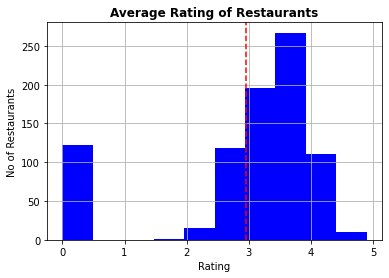

In [108]:
# sns.distplot(data.aggregate_rating, kde=False, bins=20)

data.aggregate_rating.hist(color='blue')
plt.axvline(x= data.aggregate_rating.mean(),ls='--',color='red')
plt.title('Average Rating of Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print("Mean is : ",data.aggregate_rating.mean())

Text(0, 0.5, 'No of revies')

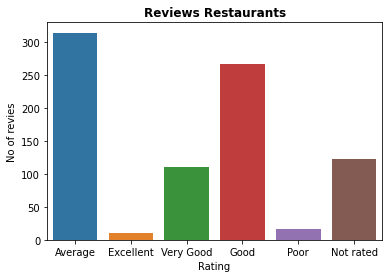

In [136]:
# data.rating_text.hist(color='blue')
sns.countplot(x=data.rating_text, data=data)
plt.title('Reviews Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of revies')

#### Observation

**Q.5) Which are the top 20 restaurant**

Text(0.5, 1.0, 'Name Vs Number of Restaurants')

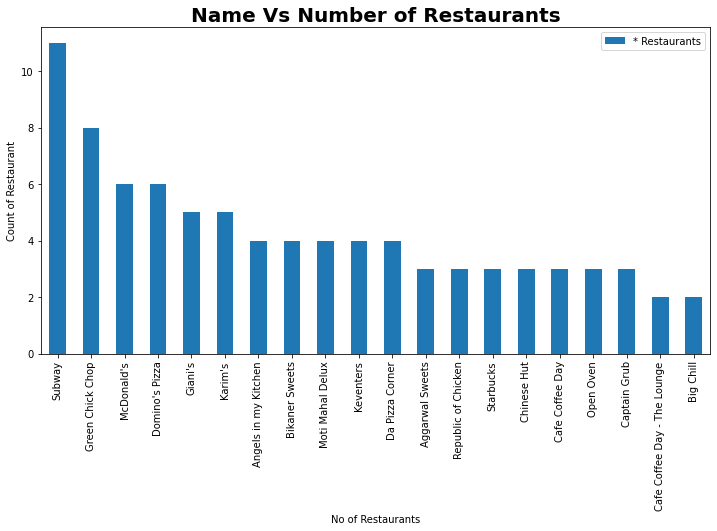

In [120]:

plt.figure(figsize=(12,6))
ax =data.restaurant_name.value_counts()[:20].plot(kind='bar')
ax.legend(['* Restaurants'])
plt.xlabel('No of Restaurants')
plt.ylabel('Count of Restaurant')
plt.title("Name Vs Number of Restaurants", fontsize=20, weight='bold')

## 3. Model

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   restaurant_name      840 non-null    object 
 1   city                 840 non-null    object 
 2   cuisines             840 non-null    object 
 3   average_cost         840 non-null    int64  
 4   has_table_booking    840 non-null    uint8  
 5   has_online_delivery  840 non-null    int64  
 6   is_delivering_now    840 non-null    uint8  
 7   price_range          840 non-null    int64  
 8   rate                 840 non-null    float64
 9   rating_text          840 non-null    object 
 10  votes                840 non-null    int64  
 11  review               840 non-null    object 
dtypes: float64(1), int64(4), object(5), uint8(2)
memory usage: 67.4+ KB


In [0]:
# drop unnecessary columns
column_to_drop = ['longitude','latitude']
data.drop(columns=column_to_drop, axis=1,inplace=True)

### 3.1 Converting to dummy variables

In [180]:
# pd.get_dummies ==> Convert categorical variable into dummy/indicator variables.(OneHot encoding)

data['has_table_booking']= pd.get_dummies(data.has_table_booking, drop_first=True)
data['has_table_booking']= pd.get_dummies(data.has_table_booking, drop_first=True)
data['is_delivering_now']= pd.get_dummies(data.is_delivering_now, drop_first=True)

data 

,restaurant_name,city,cuisines,average_cost_for_two,has_table_booking,has_online_delivery,is_delivering_now,price_range,aggregate_rating,rating_text,votes,review
0,Arigato Sushi,Yorkton,asian,25,0,0,0,2,3.3,Average,26,love arigato sushi best restaurant yorkton alw...
1,Mocha,Lucknow,cafe italian continental,800,0,0,0,3,4.6,Excellent,567,simply love placeit ideal breakfastlunchdinner...
2,Blue House Cafe,Vernonia,coffee tea mediterranean,10,0,0,0,1,4.3,Very Good,88,delicious theres single dish ive tried blue ho...
3,Star Buffet,Mayfield,asian,20,0,0,0,2,2.9,Average,11,lot food many varieties sushi fresh love many ...
4,11th Avenue Cafe Bistro,Guwahati,cafe american italian continental,400,0,0,0,2,4.1,Very Good,377,th avenue cafe always favoriteloved cheesy mea...
...,...,...,...,...,...,...,...,...,...,...,...,...
835,Angels in my Kitchen,New Delhi,bakery desserts fast food,350,0,1,0,1,3.7,Good,248,angels always excellent confectionery chocolat...
836,Red Mango,New Delhi,cafe desserts,700,0,1,0,2,3.7,Good,185,owner much bad cheat staff salary product fres...
837,The Beer Cafe,New Delhi,finger food north indian italian,1250,0,0,0,3,3.8,Good,170,casual meet office collegues ordered pasta alf...
838,Punjabi By Nature Express,New Delhi,north indian street food mughlai,600,0,0,0,2,3.5,Good,206,guy serving sense explain drinks showed drink ...


In [181]:
#  cuisines converted to categorical features

data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

indian north                    63
indian mughlai north            47
chinese indian mughlai north    36
chinese indian north            36
chinese                         31
Name: cuisines, dtype: int64

In [0]:
data = data.rename(columns={
    'average_cost_for_two':'average_cost',
    'aggregate_rating':'rate'
    })

## 3.2 Splitting data for Model Building

In [0]:
# build x & y dataset
x = data.drop(['restaurant_name','rate'],axis = 1)
y = data['rate']

In [194]:
x.shape, y.shape

((840, 10), (840,))

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [196]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((588, 10), (252, 10), (588,), (252,))

In [0]:
# One hot encoder
enc = OneHotEncoder( handle_unknown='ignore')

In [0]:
## ALWAYS AVOID DATA LEAKAGE

# this method is for training data set
def one_hot_fit_transform(df,name):
    output_data = df[name].values.reshape(-1, 1)
    return enc.fit_transform(output_data).toarray()

# this method is for test data set
def one_hot_transform(df,name):
    output_data1 = df[name].values.reshape(-1, 1)
    return enc.transform(output_data1).toarray()

In [0]:
# one hot encoding apply to 'rest_type' features on train/test dataset
tr_dummy_rating_text = one_hot_fit_transform(X_train,'rating_text' )
te_dummy_rating_text = one_hot_transform(X_test,'rating_text' )

# one hot encoding apply to 'location' features on train/test dataset
tr_dummy_city = one_hot_fit_transform(X_train,'city' )
te_dummy_city= one_hot_transform(X_test,'city')

# one hot encoding apply to 'cuisines' features on train/test dataset
tr_dummy_cuisines = one_hot_fit_transform(X_train,'cuisines' )
te_dummy_cuisines = one_hot_transform(X_test,'cuisines')

In [202]:
tr_dummy_rating_text.shape, te_dummy_rating_text.shape

((588, 6), (252, 6))

In [203]:
tr_dummy_cuisines.shape, te_dummy_cuisines.shape

((588, 212), (252, 212))

In [204]:
tr_dummy_city.shape, te_dummy_city.shape

((588, 17), (252, 17))

In [223]:
## combine all 'one-hot' encoded features as Tr.
tr =pd.DataFrame(pd.np.column_stack([ tr_dummy_rating_text,tr_dummy_city, tr_dummy_cuisines]))

## CONCAT both dataframe ### ie Tr and X_train(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l1=X_train.values.tolist()
l2=tr.values.tolist()

for i in range(len(l1)):
    l1[i].extend(l2[i])

X_train=pd.DataFrame(l1,columns=X_train.columns.tolist()+tr.columns.tolist())
X_train.shape

(588, 477)

In [224]:
## combine all 'one-hot' encoded features as Te.
te =pd.DataFrame(pd.np.column_stack([ te_dummy_rating_text,te_dummy_city,te_dummy_cuisines]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=X_test.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_test=pd.DataFrame(l3,columns=X_test.columns.tolist()+te.columns.tolist())
X_test.shape

(252, 477)

In [0]:
# after onehot encoding DONE. 'location','rest_type','cuisines' are redundant features. REMOVE them.

# X_train =X_train.drop(['city','rating_text','cuisines','review'],axis = 1)
# X_test =X_test.drop(['city','rating_text','cuisines','review'],axis = 1)

X_train =X_train.drop(['review'],axis = 1)
X_test =X_test.drop(['review'],axis = 1)

In [228]:
X_train.head(2)

,average_cost,has_table_booking,has_online_delivery,is_delivering_now,price_range,votes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,...,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234
0,550,0,1,0,2,21,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,500,0,1,0,2,167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [233]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((588, 476), (252, 476), (588,), (252,))

In [234]:
print(x.shape)
print(y.shape)

(840, 10)
(840,)


In [235]:
dump(X_train, 'max_features_pkl/more_feature_X_train')
dump(X_test, 'max_features_pkl/more_feature_X_test')
dump(y_train, 'max_features_pkl/more_feature_y_train')
dump(y_test, 'max_features_pkl/more_feature_y_test')

['max_features_pkl/more_feature_y_test']

In [0]:
X_train= load('max_features_pkl/more_feature_X_train') 
X_test= load('max_features_pkl/more_feature_X_test')
y_train= load('max_features_pkl/more_feature_y_train')
y_test= load('max_features_pkl/more_feature_y_test')

In [0]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


def mse(y, y_pred):
    return np.mean((y_pred - y)**2) 

mse_scorer = make_scorer(mse, greater_is_better=False)

## Building Random Model(For Worst case MSE)

In [238]:
import random

rand_pred= np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
    rand_probs = round(random.uniform(1.0, 5.0),2)
    rand_pred[i] = rand_probs

mse(y_test, rand_pred)

2.7511571428571426

Here we can see that random model provide 2.53 MSE value. We can take this as a cut off. Any model which has MSE less than random model is considered as better model.

## Model -1 Linear Regression

In [239]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

mse(y_test, y_pred_lr)

0.043071651020757946

## Model -2 Random Forest Regressor

In [240]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.03890772615079349

In [248]:
tuned_parameters = {'n_estimators': [500]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(X_train, y_train)

y_pred_grd = grd_regressor.predict(X_test)

mse(y_test, y_pred_grd)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.7s finished


0.03799677087809369

After above experiment we got below result

- MSE:  0.04004986221340383 == 50(n_estimators)
- MSE:  0.03807506691137555 == 100 (n_estimators)
- MSE:  0.0377001297623944 == 150 (n_estimators)
- MSE:  0.03828087737268492 ==200(n_estimators)
- MSE:  0.03799677087809369 ===500 (n_estimators)

Final n_estimators choose 150


### Best Parameter Model

In [249]:

rfr = RandomForestRegressor(max_depth=None,n_estimators=150,min_samples_split= 2)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.03767799373424765

In [250]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
660,0.0,0.000000
622,3.7,3.751333
645,0.0,0.000000
286,3.1,2.980667
457,2.8,3.200667
...,...,...
170,3.2,3.159333
42,4.0,4.122667
516,4.1,4.064667
184,3.2,2.986222
